<a href="https://colab.research.google.com/github/Tharuka606/SMS-Text-Classifier/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.7/657.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
2.20.0-dev20250403


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2025-04-04 14:35:46--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.04s   

2025-04-04 14:35:46 (7.80 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2025-04-04 14:35:46--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [3]:
# Load the data
train_data = pd.read_csv(train_file_path, sep="\t", header=None, names=["label", "message"])
test_data = pd.read_csv(test_file_path, sep="\t", header=None, names=["label", "message"])

# Map the labels
train_data["label_num"] = train_data["label"].map({"ham": 0, "spam": 1})
test_data["label_num"] = test_data["label"].map({"ham": 0, "spam": 1})

# Split into features and labels
X_train = train_data["message"]
y_train = train_data["label_num"]

<ipython-input-4-40f90ed3a9b5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="label", palette="Set2")


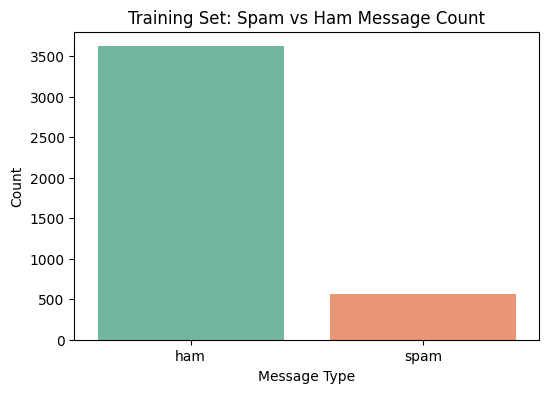

In [4]:
# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x="label", palette="Set2")
plt.title("Training Set: Spam vs Ham Message Count")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

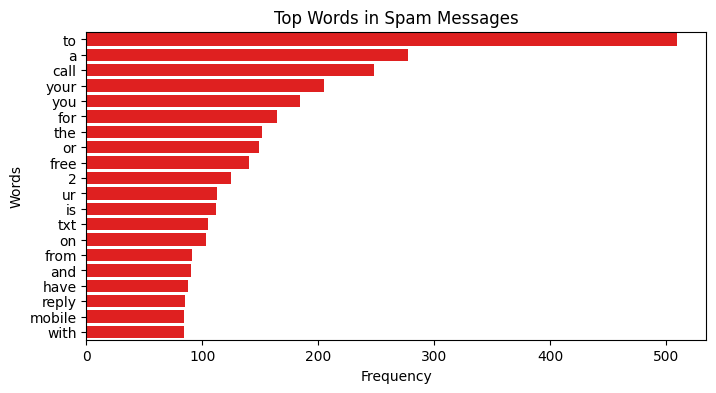

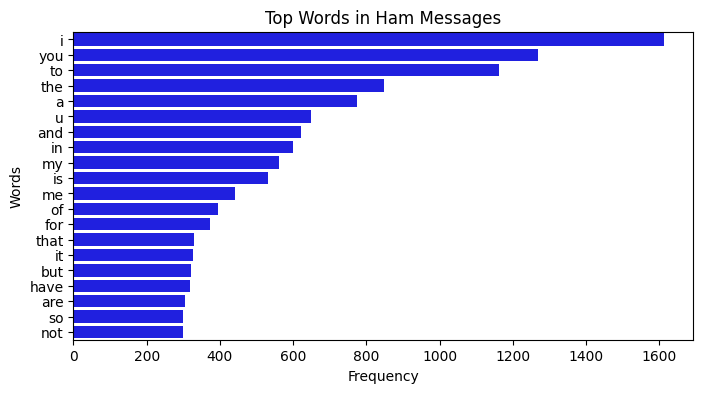

In [5]:
from collections import Counter
import itertools

def get_top_n_words(messages, n=20):
    all_words = list(itertools.chain(*[msg.lower().split() for msg in messages]))
    return dict(Counter(all_words).most_common(n))

spam_words = get_top_n_words(train_data[train_data["label"] == "spam"]["message"])
ham_words = get_top_n_words(train_data[train_data["label"] == "ham"]["message"])

# Plot spam words
plt.figure(figsize=(8,4))
sns.barplot(x=list(spam_words.values()), y=list(spam_words.keys()), color="red")
plt.title("Top Words in Spam Messages")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot ham words
plt.figure(figsize=(8,4))
sns.barplot(x=list(ham_words.values()), y=list(ham_words.keys()), color="blue")
plt.title("Top Words in Ham Messages")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer  # use CountVectorizer here!
from sklearn.naive_bayes import MultinomialNB

model = Pipeline([
    ('vect', CountVectorizer()),
    ('nb', MultinomialNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('nb', MultinomialNB())])

In [7]:
def predict_message(pred_text):
    spam_prob = model.predict_proba([pred_text])[0][1]  # Get probability of 'spam'
    label = "spam" if spam_prob >= 0.5 else "ham"
    return [float(spam_prob), label]

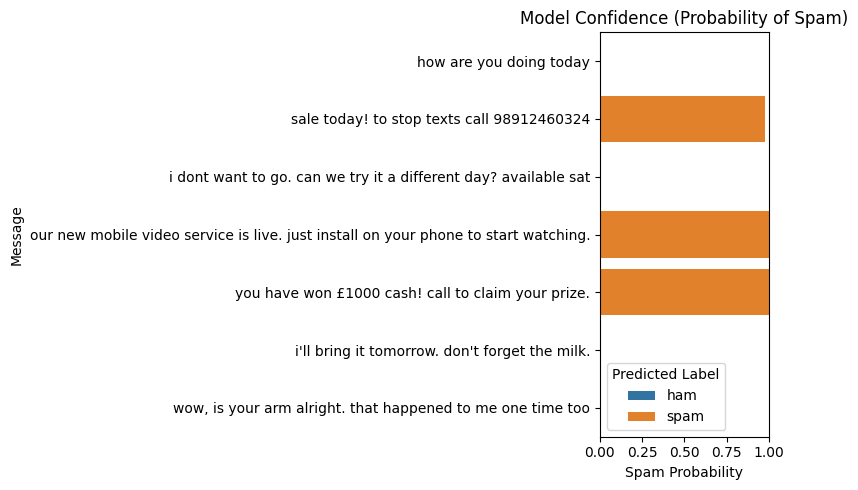

In [8]:
# Visualize prediction confidence for each test message
test_messages = [
    "how are you doing today",
    "sale today! to stop texts call 98912460324",
    "i dont want to go. can we try it a different day? available sat",
    "our new mobile video service is live. just install on your phone to start watching.",
    "you have won £1000 cash! call to claim your prize.",
    "i'll bring it tomorrow. don't forget the milk.",
    "wow, is your arm alright. that happened to me one time too"
]

probs = []
labels = []

for msg in test_messages:
    result = predict_message(msg)
    probs.append(result[0])
    labels.append(result[1])

plt.figure(figsize=(8,5))
sns.barplot(x=probs, y=test_messages, hue=labels, dodge=False)
plt.title("Model Confidence (Probability of Spam)")
plt.xlabel("Spam Probability")
plt.ylabel("Message")
plt.xlim(0,1)
plt.legend(title="Predicted Label")
plt.tight_layout()
plt.show()

In [9]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

You passed the challenge. Great job!
